#### 1. General Overview of the Dataset
#### Check Data Types, Null Values, and Shape: Understand the structure of the data (e.g., number of rows, columns, and data types).

#### Summary Statistics: Look at the central tendency, distribution, and spread for numerical columns.

#### Check for Missing Values: Understand the missing data in the dataset.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
df_global = pd.read_excel('Spotify Global Chart 2024.xlsx')
df_million = pd.read_csv('spotify_millsongdata.csv')

In [29]:
# 1. General Info
print(df_global.info())
print(df_million.info())
print(df_global.describe())
print(df_million.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Source.Name     10600 non-null  object
 1   rank            10600 non-null  int64 
 2   uri             10600 non-null  object
 3   artist_names    10600 non-null  object
 4   track_name      10600 non-null  object
 5   source          10600 non-null  object
 6   peak_rank       10600 non-null  int64 
 7   previous_rank   10600 non-null  int64 
 8   weeks_on_chart  10600 non-null  int64 
 9   streams         10600 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 828.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650

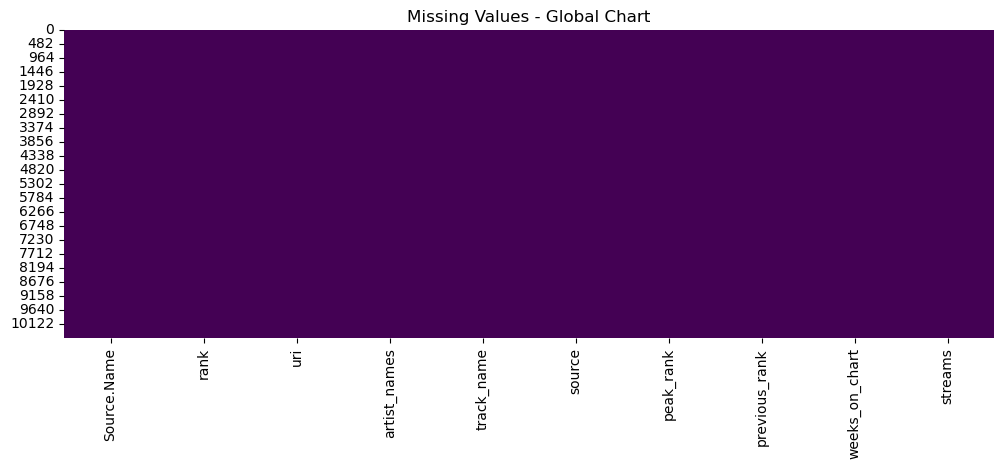

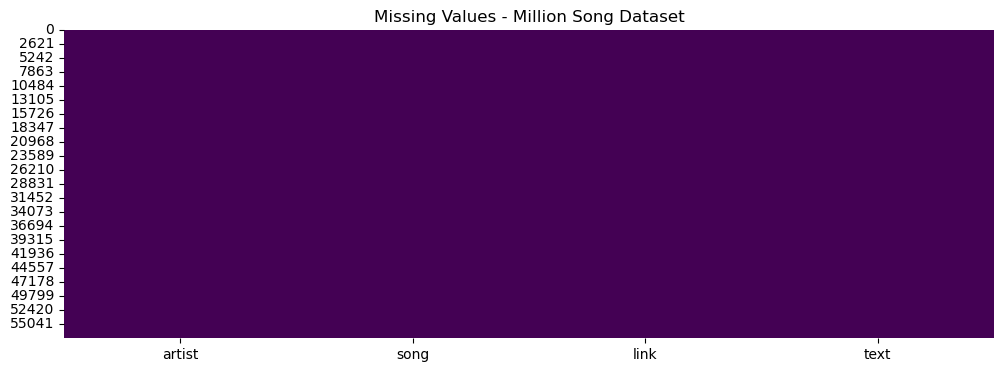

In [30]:
# 2. Null Value Heatmaps
plt.figure(figsize=(12, 4))
sns.heatmap(df_global.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values - Global Chart')
plt.show()

plt.figure(figsize=(12, 4))
sns.heatmap(df_million.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values - Million Song Dataset')
plt.show()

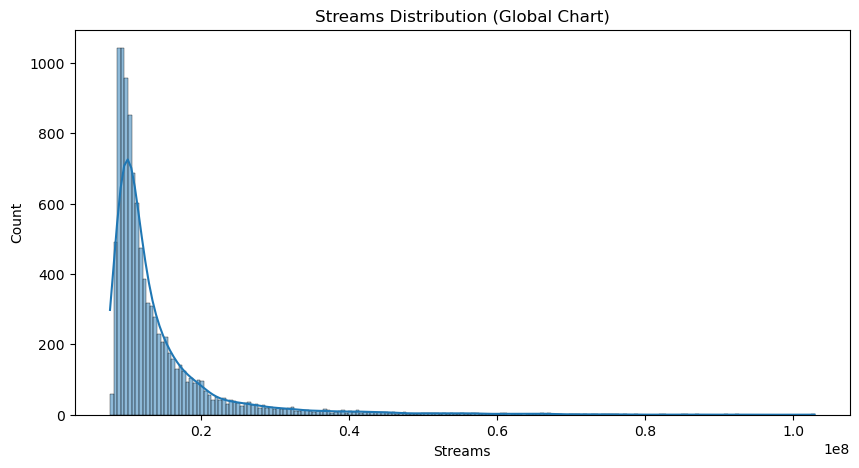

In [31]:
# 3. Popularity Distribution (for Global Chart)
# We don't have popularity, but streams are a good indicator
plt.figure(figsize=(10, 5))
sns.histplot(df_global['streams'], kde=True)
plt.title('Streams Distribution (Global Chart)')
plt.xlabel('Streams')
plt.show()

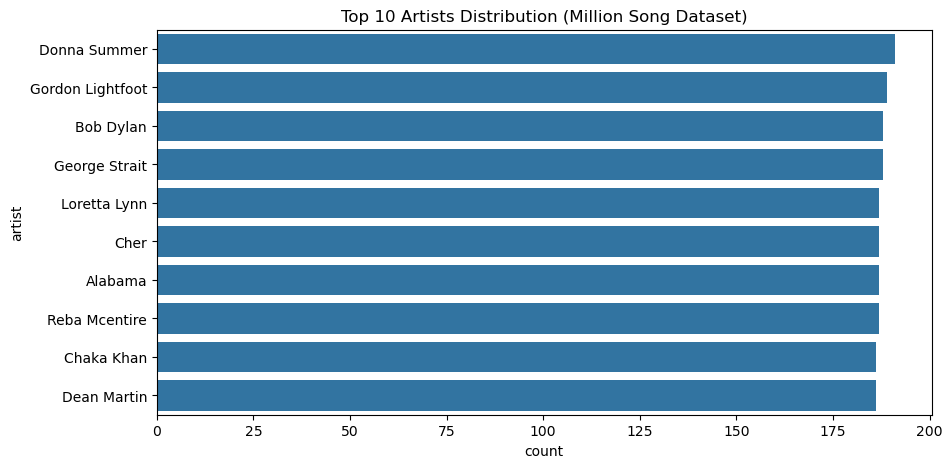

In [32]:
# 4. Streams Distribution (for Million Song Dataset)
# We don't have streams directly, so we'll focus on song counts per artist
plt.figure(figsize=(10, 5))
sns.countplot(y='artist', data=df_million, order=df_million['artist'].value_counts().head(10).index)
plt.title('Top 10 Artists Distribution (Million Song Dataset)')
plt.show()

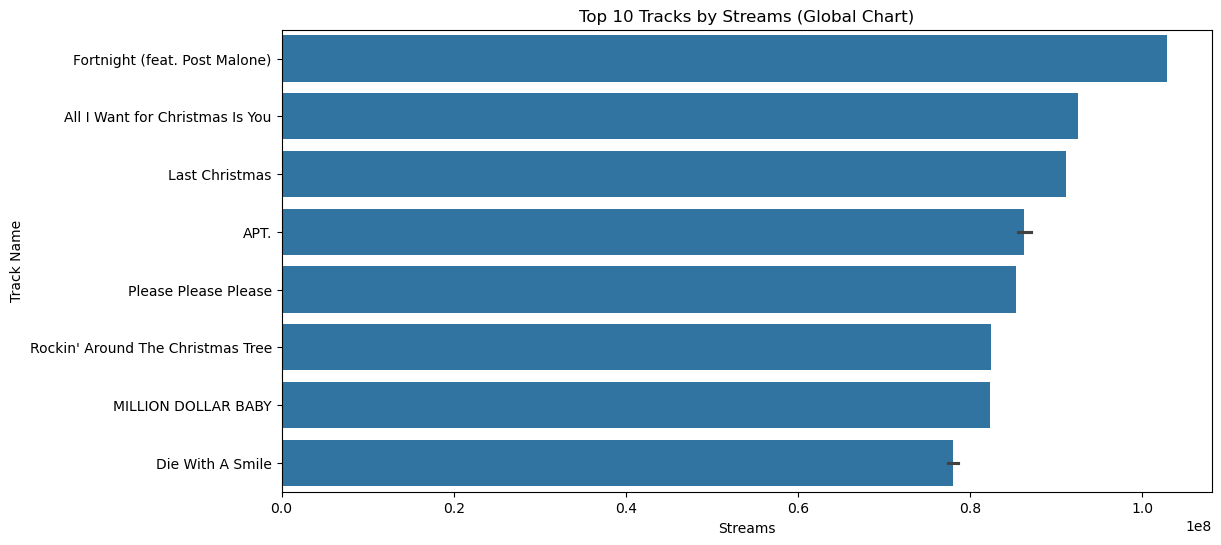

In [33]:
# 5. Track Popularity by Artist (Global Chart)
plt.figure(figsize=(12, 6))
sns.barplot(x='streams', y='track_name', data=df_global.sort_values(by='streams', ascending=False).head(10))
plt.title('Top 10 Tracks by Streams (Global Chart)')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.show()

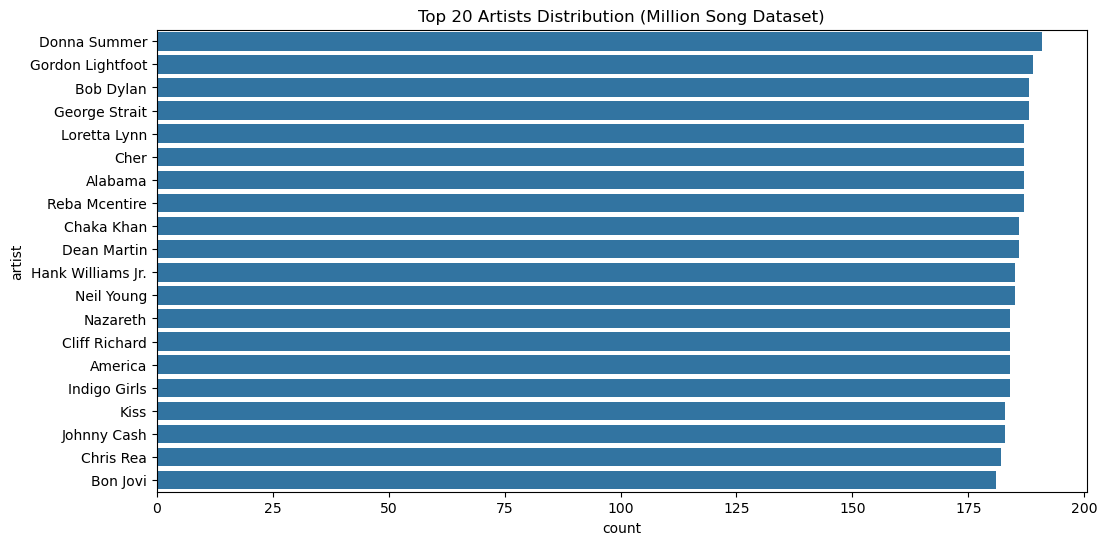

In [37]:
# 6. Artist Distribution (Million Song Dataset)
plt.figure(figsize=(12, 6))
sns.countplot(y='artist', data=df_million, order=df_million['artist'].value_counts().head(20).index)
plt.title('Top 20 Artists Distribution (Million Song Dataset)')
plt.show()

C:\Users\sahini.kallepally\AppData\Local\Temp\ipykernel_20860\1578536956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='track_name', data=top_tracks, palette='viridis')


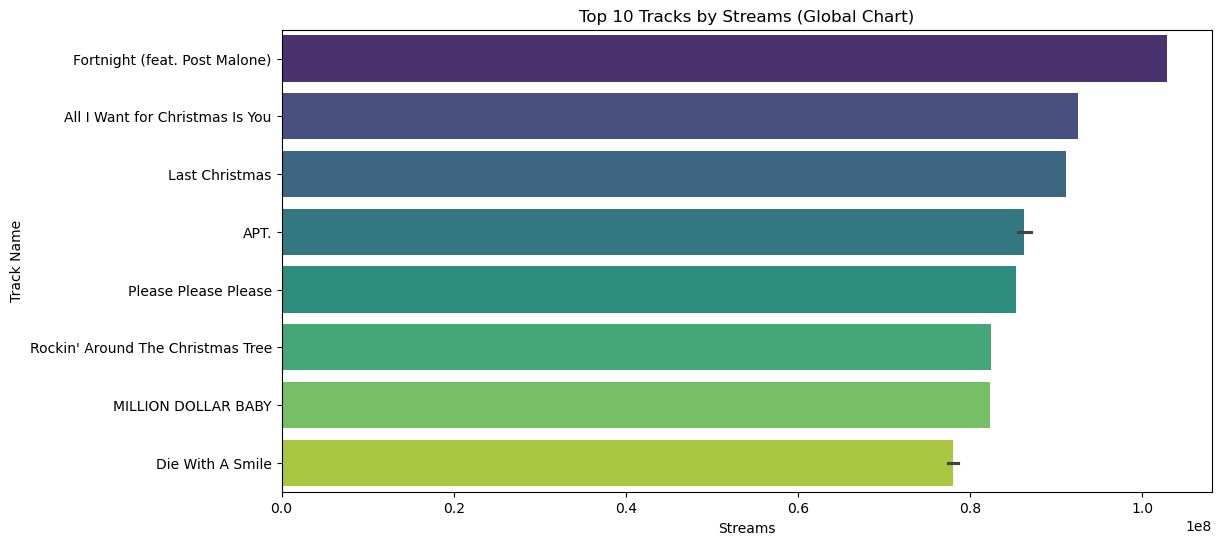

In [41]:
# 7. Top Tracks by Streams (Global Chart)
top_tracks = df_global.sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='streams', y='track_name', data=top_tracks, palette='viridis')
plt.title('Top 10 Tracks by Streams (Global Chart)')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.show()

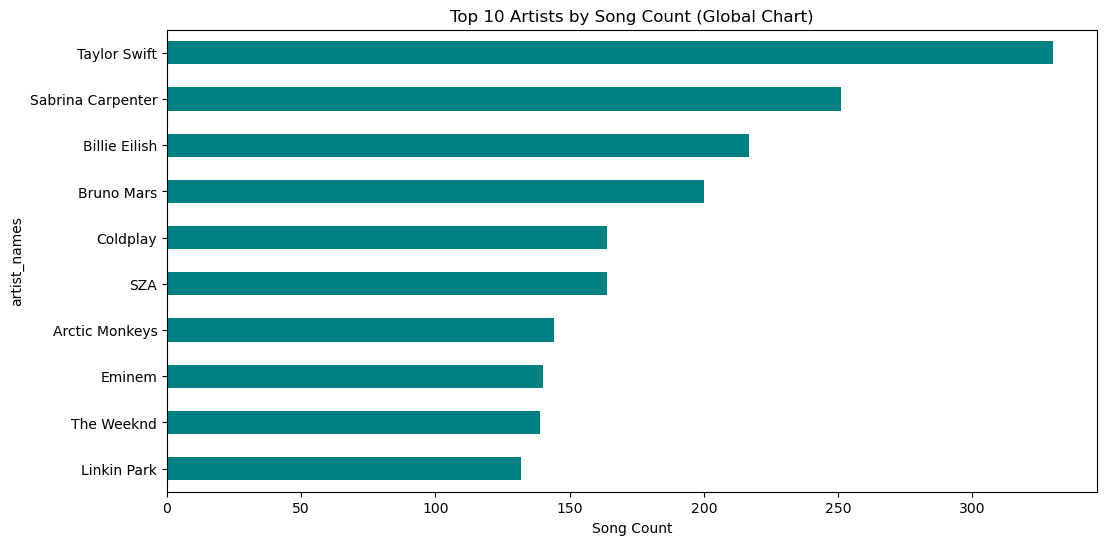

In [42]:
# 8. Artist vs. Streams (Global Chart)
plt.figure(figsize=(12, 6))
df_global['artist_names'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Artists by Song Count (Global Chart)')
plt.xlabel('Song Count')
plt.gca().invert_yaxis()
plt.show()

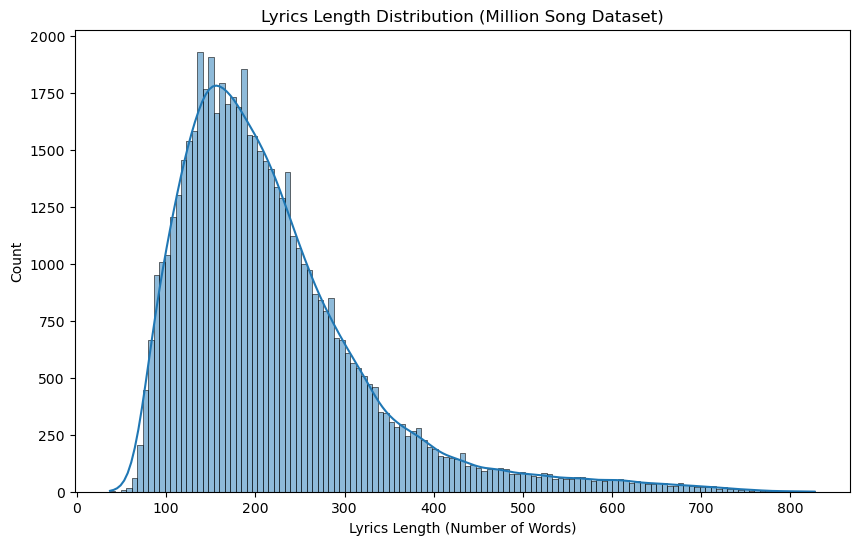

In [43]:
# 9. Song Length Analysis (If applicable, based on text data in Million Song Dataset)
# We can analyze song length via the 'text' column (number of words/characters)
df_million['lyrics_length'] = df_million['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df_million['lyrics_length'], kde=True)
plt.title('Lyrics Length Distribution (Million Song Dataset)')
plt.xlabel('Lyrics Length (Number of Words)')
plt.show()

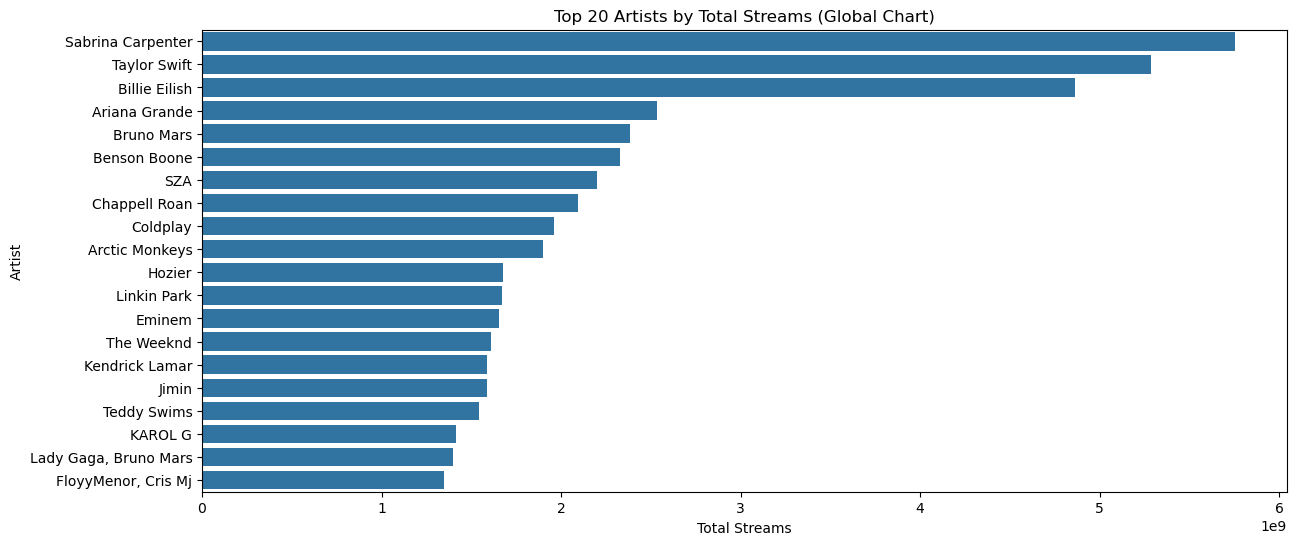

In [44]:
# 10. Artist Popularity in Global Chart (using streams)
artist_popularity = df_global.groupby('artist_names')['streams'].sum().reset_index()
artist_popularity = artist_popularity.sort_values(by='streams', ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x='streams', y='artist_names', data=artist_popularity)
plt.title('Top 20 Artists by Total Streams (Global Chart)')
plt.xlabel('Total Streams')
plt.ylabel('Artist')
plt.show()

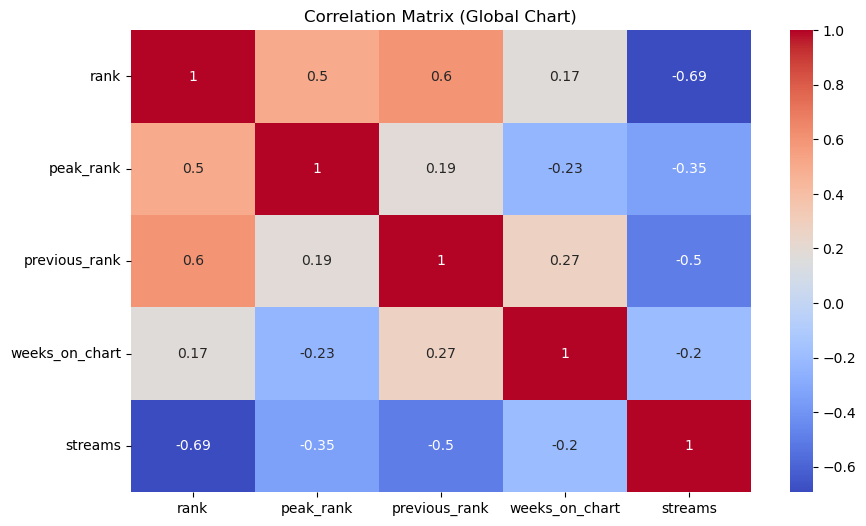

In [45]:
# 11. Correlation Heatmap (For numeric columns in Global Chart)
numerics = df_global.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerics.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Global Chart)')
plt.show()

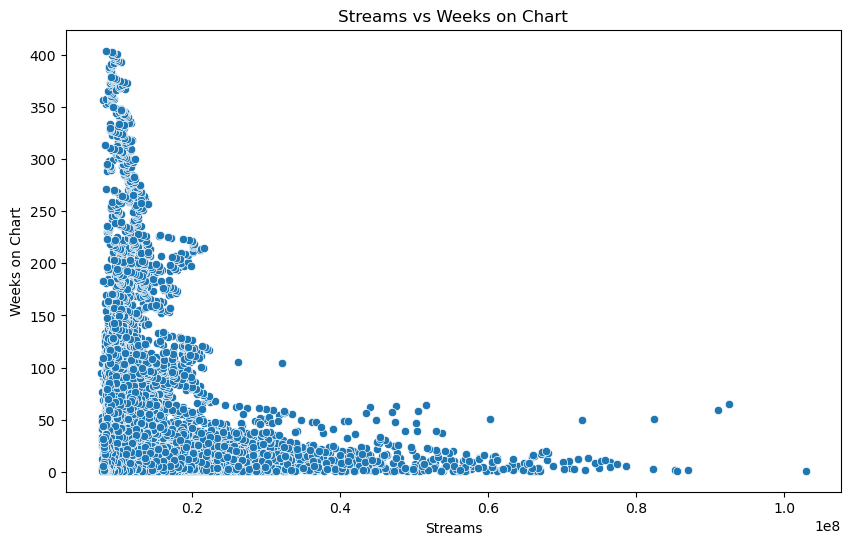

In [47]:
# 12. Streams vs Weeks on Chart (Global Chart)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='streams', y='weeks_on_chart', data=df_global)
plt.title('Streams vs Weeks on Chart')
plt.xlabel('Streams')
plt.ylabel('Weeks on Chart')
plt.show()

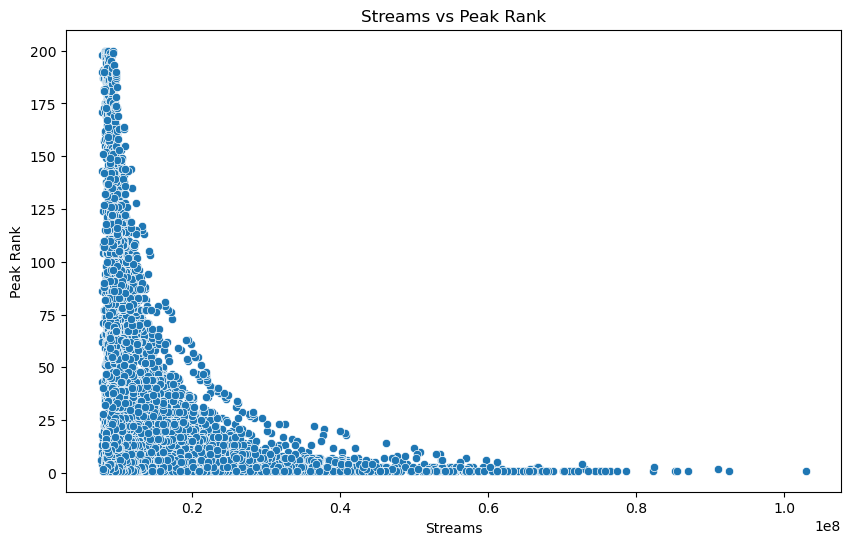

In [48]:
# Streams vs Peak Rank (Global Chart)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='streams', y='peak_rank', data=df_global)
plt.title('Streams vs Peak Rank')
plt.xlabel('Streams')
plt.ylabel('Peak Rank')
plt.show()